# Task 6.2: Heart Disease Prediction using Logistic Regression

Predict whether a patient has heart disease based on age, gender, cholesterol, and blood pressure.

## Step 1: Load and Inspect the Dataset

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("heart_disease.csv")

# Preview data
print(df.head())
df.info()
df.describe()

   age  sex  Cholesterol  Blood Pressure  Heart Disease
0   63    1          233             145              1
1   37    1          250             130              1
2   41    0          204             130              1
3   56    1          236             120              1
4   57    0          354             120              1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             303 non-null    int64
 1   sex             303 non-null    int64
 2   Cholesterol     303 non-null    int64
 3   Blood Pressure  303 non-null    int64
 4   Heart Disease   303 non-null    int64
dtypes: int64(5)
memory usage: 12.0 KB


,age,sex,Cholesterol,Blood Pressure,Heart Disease
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,246.264026,131.623762,0.544554
std,9.082101,0.466011,51.830751,17.538143,0.498835
min,29.000000,0.000000,126.000000,94.000000,0.000000
25%,47.500000,0.000000,211.000000,120.000000,0.000000
50%,55.000000,1.000000,240.000000,130.000000,1.000000
75%,61.000000,1.000000,274.500000,140.000000,1.000000
max,77.000000,1.000000,564.000000,200.000000,1.000000


## Step 2: Data Cleaning
- Check missing values
- Check for duplicates

In [19]:
missing = df.isnull().sum()
duplicates = df.duplicated().sum()

print(f"Missing values: {missing}")
print(f"Duplicate rows: {duplicates}")

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

print("✅ Data cleaned (missing and duplicates removed if present).")

Missing values: age               0
sex               0
Cholesterol       0
Blood Pressure    0
Heart Disease     0
dtype: int64
Duplicate rows: 1
✅ Data cleaned (missing and duplicates removed if present).


## Step 3: Feature Visualization

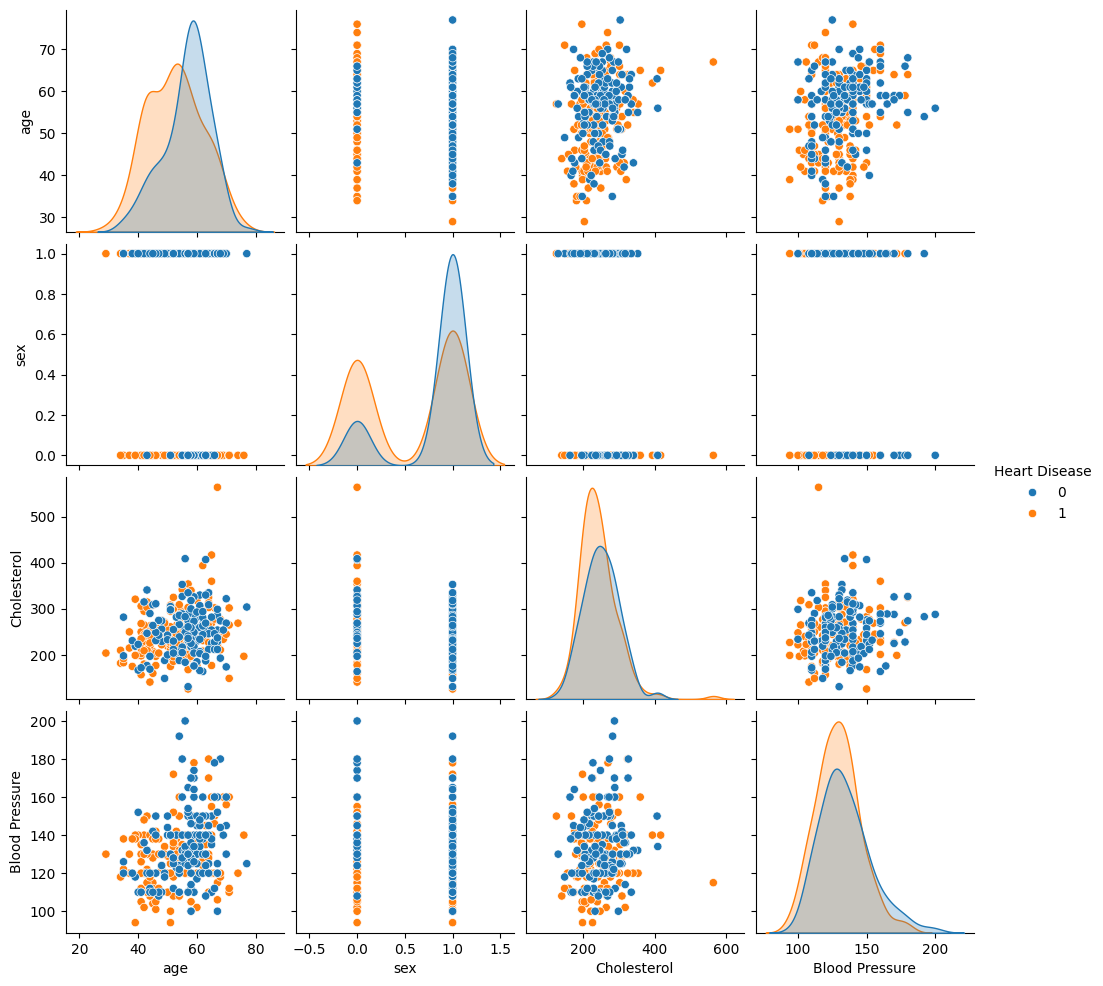

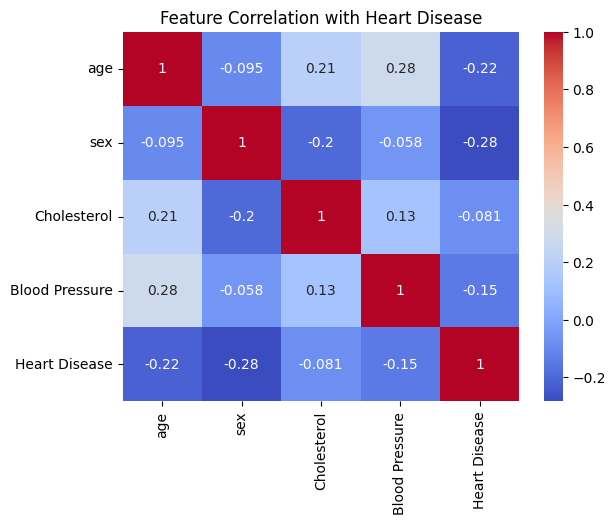

In [20]:
sns.pairplot(df, hue='Heart Disease')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Heart Disease")
plt.show()


## Step 4: Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 5: Train Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Step 6: Evaluation

Accuracy:  0.66
Precision: 0.74
Recall:    0.53
F1 Score:  0.62


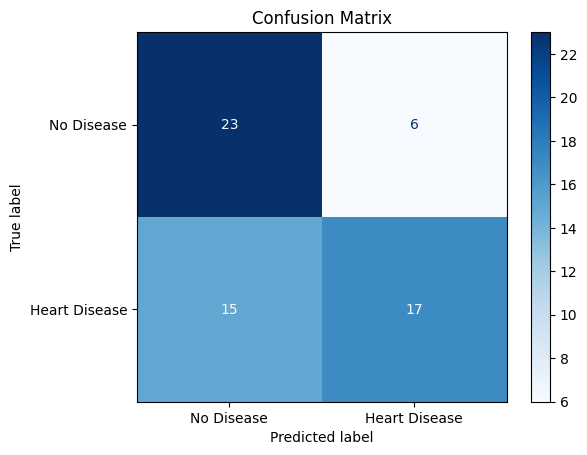

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Scores
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['No Disease', 'Heart Disease']).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


## Final Insights

### Model Performance:
- **Accuracy**: 66% — The model correctly predicts heart disease presence in 2 out of 3 cases.
- **Precision**: 74% — When the model predicts a patient has heart disease, it is correct 74% of the time.
- **Recall**: 53% — It detects 53% of actual heart disease cases.
- **F1 Score**: 62% — The balance between precision and recall indicates moderate classification ability.

>⚠️ **Note:** 
>>The performance of the model (accuracy, precision, recall, and F1 score) is directly influenced by the dataset used. This analysis was based on a publicly available heart disease dataset with limited features. A more comprehensive dataset — including additional medical parameters such as chest pain type, exercise-induced angina, or ECG results — could significantly enhance the model's ability to detect heart disease and improve overall evaluation metrics.
